# Python for Data Science
## Session 8
### Plotting


---

## Outline


1. Matplotlib and Seaborn  
2. Plotting techniques and customization  
    
   

## Plotting 
### Seaborn

Home exercises. Note that you may need to also use pandas to answer some of the questions. 

1. Create a *lineplot* showing how **Study Time** varies by **Student Name**. Which student has the highest study time?

2. Plot a histogram (*histplot*) of **Grade** and determine which grade range has the highest frequency of students.

3. Create an ECDF plot (*ecdfplot*) for **Grade**. What is the percentage of students scoring less than 85?

4. Create a *stripplot* showing **Grade** distribution for each **Course**. Which course has the most spread in grades?

5. Create a *swarmplot* to show the relationship between Gender and **Study Time**. Which gender has a higher average study time?

6. Plot a *pointplot* to show the average **Grade** for each Course. Which course has the highest average grade?

1. Create a *lineplot* showing how **Study Time** varies by **Student Name**. Which student has the highest study time?

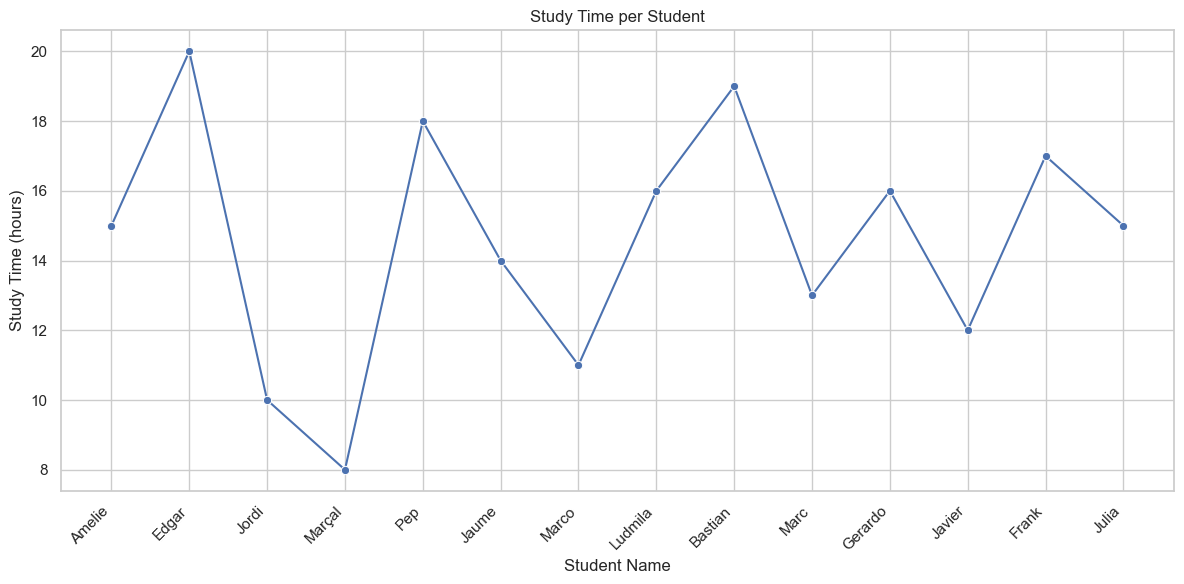

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'Student Name': ['Amelie', 'Edgar', 'Jordi', 'Marçal', 'Pep', 'Jaume', 'Marco', 
                     'Ludmila', 'Bastian', 'Marc', 'Gerardo', 'Javier', 'Frank', 'Julia'],
    'Course': ['Artificial Intelligence', 'Python for Data Science', 'Cloud Computing', 'Computer Vision', 
               'Artificial Intelligence', 'Python for Data Science', 'Cloud Computing', 'Computer Vision', 
               'Artificial Intelligence', 'Python for Data Science', 'Cloud Computing', 'Computer Vision', 
               'Artificial Intelligence', 'Python for Data Science'],
    'Grade': [85, 92, 78, 88, 91, 84, 73, 95, 90, 80, 85, 87, 89, 92],
    'Gender': ['Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female'],
    'Study Time': [15, 20, 10, 8, 18, 14, 11, 16, 19, 13, 16, 12, 17, 15],
    'Age': [22, 21, 23, 22, 20, 24, 22, 21, 23, 21, 22, 22, 21, 20]
}

df = pd.DataFrame(data)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Student Name", y="Study Time", marker="o")
plt.xticks(rotation=45, ha='right')  # Ruotare i nomi degli studenti per leggibilità
plt.title("Study Time per Student")
plt.xlabel("Student Name")
plt.ylabel("Study Time (hours)")
plt.tight_layout()
plt.show()

The student Edgar has the highest study time with 20 hours.

2. Plot a histogram (*histplot*) of **Grade** and determine which grade range has the highest frequency of students.

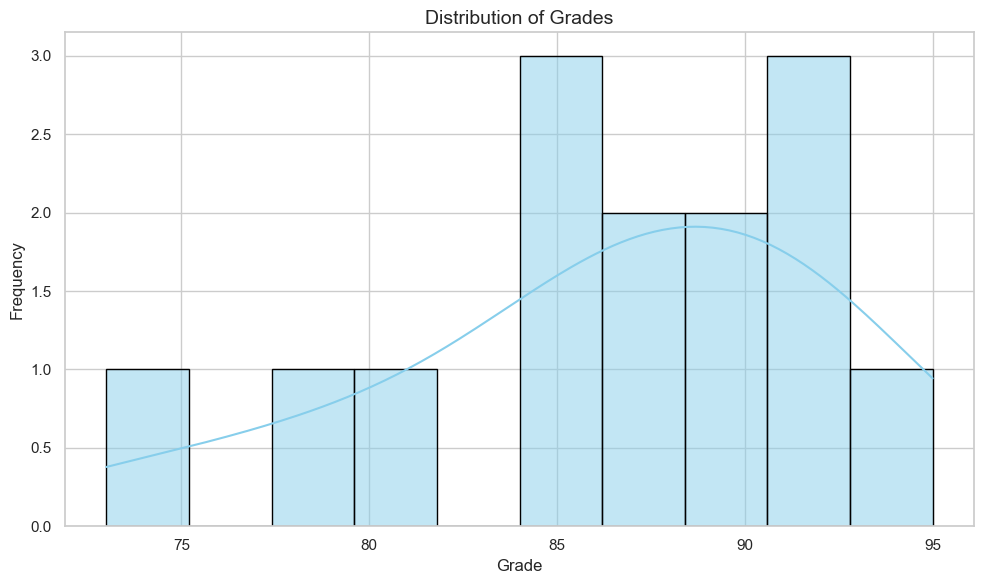

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the histogram for Grade
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Grade", bins=10, kde=True, color="skyblue", edgecolor="black")
plt.title("Distribution of Grades", fontsize=14)
plt.xlabel("Grade", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()



Based on the histogram, the grade range with the highest frequency is 90 to 95, as it corresponds to the tallest bar.

3. Create an ECDF plot (*ecdfplot*) for **Grade**. What is the percentage of students scoring less than 85?


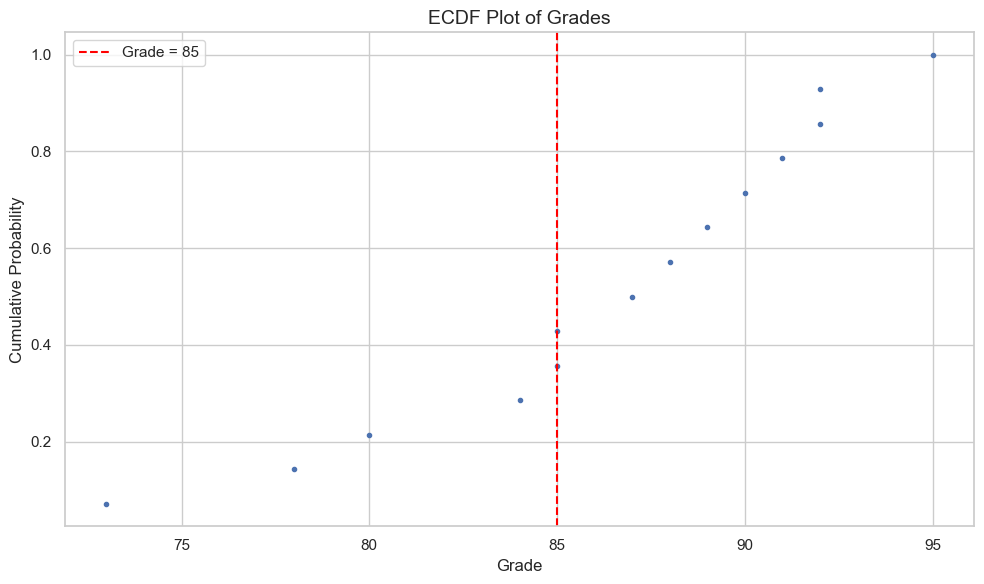

The percentage of students scoring less than 85 is: 28.6%


In [57]:
import matplotlib.pyplot as plt
import numpy as np

sorted_grades = np.sort(df['Grade'])
ecdf = np.arange(1, len(sorted_grades) + 1) / len(sorted_grades)

# Plot the ECDF
plt.figure(figsize=(10, 6))
plt.plot(sorted_grades, ecdf, marker=".", linestyle="none")
plt.axvline(x=85, color="red", linestyle="--", label="Grade = 85")
plt.title("ECDF Plot of Grades", fontsize=14)
plt.xlabel("Grade", fontsize=12)
plt.ylabel("Cumulative Probability", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

num_below_85 = sum(df['Grade'] < 85)
percentage_below_85 = (num_below_85 / len(df)) * 100

print(f"The percentage of students scoring less than 85 is: {percentage_below_85:.1f}%")


4. Create a *stripplot* showing **Grade** distribution for each **Course**. Which course has the most spread in grades?


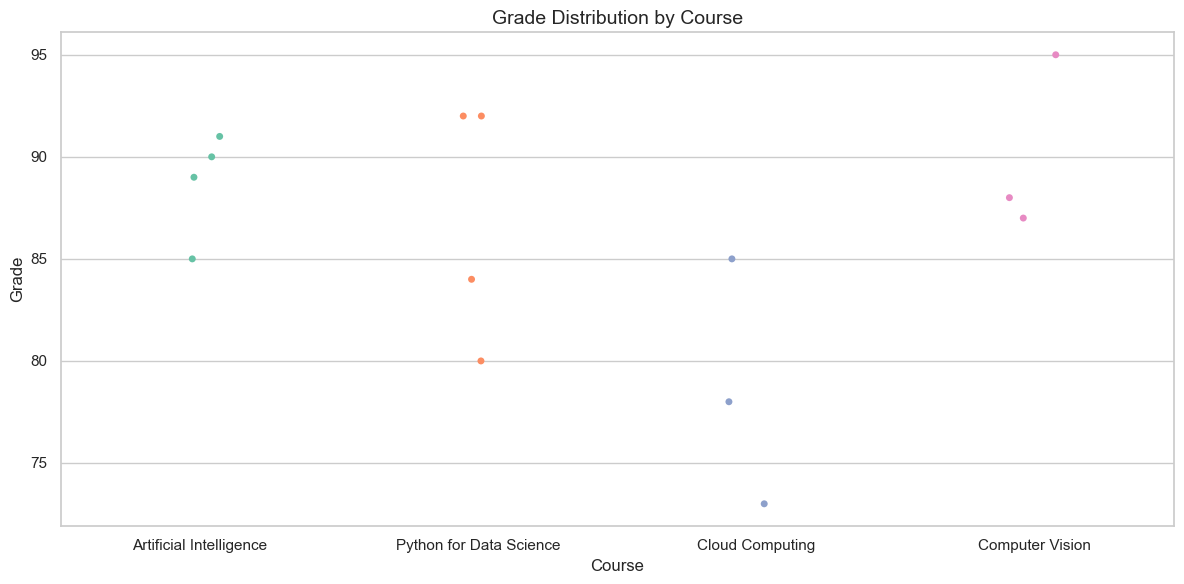

The course with the most spread in grades is: Cloud Computing


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a stripplot to show Grade distribution for each Course
plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x="Course", y="Grade", jitter=True, marker="o", hue="Course", dodge=False, legend=False, palette="Set2")
plt.title("Grade Distribution by Course", fontsize=14)
plt.xlabel("Course", fontsize=12)
plt.ylabel("Grade", fontsize=12)
plt.tight_layout()
plt.show()

spread_per_course = df.groupby('Course')['Grade'].agg(lambda x: x.max() - x.min())
most_spread_course = spread_per_course.idxmax()

print(f"The course with the most spread in grades is: {most_spread_course}")


5. Create a *swarmplot* to show the relationship between Gender and **Study Time**. Which gender has a higher average study time?

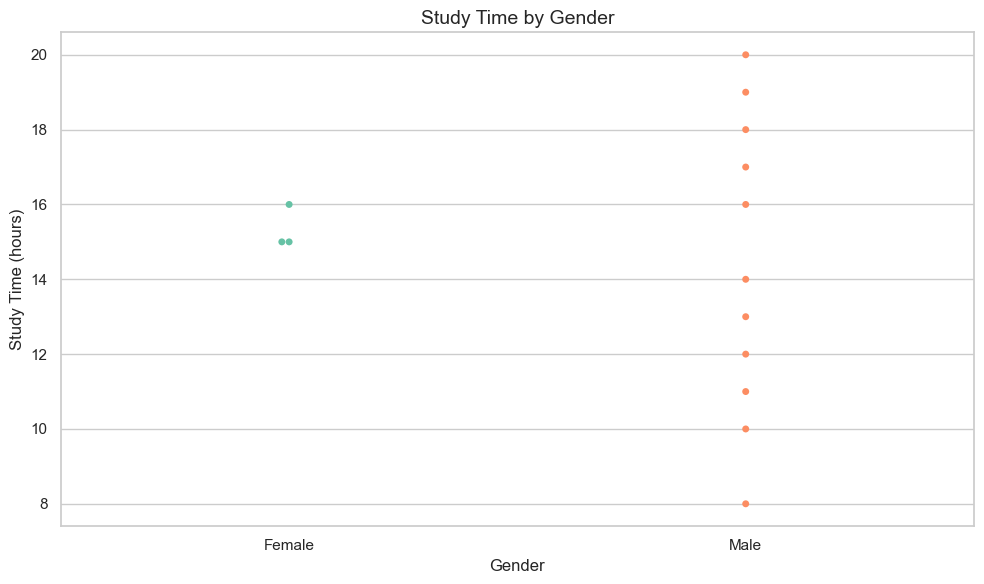

The gender with the higher average study time is: Female


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a swarmplot to show the relationship between Gender and Study Time
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x="Gender", y="Study Time", hue="Gender", dodge=False, palette="Set2", legend=False)
plt.title("Study Time by Gender", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Study Time (hours)", fontsize=12)
plt.tight_layout()
plt.show()

average_study_time = df.groupby("Gender")["Study Time"].mean()
gender_with_higher_average = average_study_time.idxmax()

print(f"The gender with the higher average study time is: {gender_with_higher_average}")


6. Plot a *pointplot* to show the average **Grade** for each Course. Which course has the highest average grade?

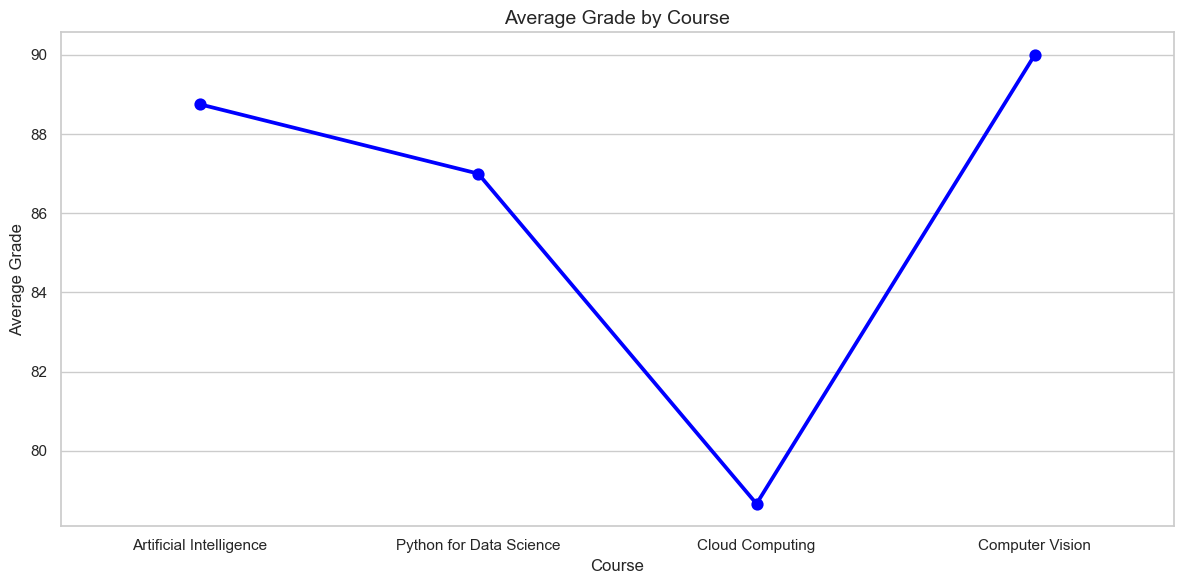

The course with the highest average grade is: Computer Vision


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a pointplot to show the average grades (Grade) for each course (Course)
plt.figure(figsize=(12, 6))
sns.pointplot(data=df, x="Course", y="Grade", estimator="mean", errorbar=None, markers="o", color="blue")
plt.title("Average Grade by Course", fontsize=14)
plt.xlabel("Course", fontsize=12)
plt.ylabel("Average Grade", fontsize=12)
plt.tight_layout()
plt.show()

average_grade_per_course = df.groupby("Course")["Grade"].mean()
course_with_highest_average = average_grade_per_course.idxmax()

print(f"The course with the highest average grade is: {course_with_highest_average}")


## Plotting 
### Seaborn

So far, we have seen different type of plotting functions, starting from simple ones using **Matplotlib**, to later finish using **Seaborn** together with **Matplotlib**, to visualize data in a cooler way.

Now it's up to your imagination to visualise your data in the best possible way.